# Clustering MNIST


Exercice présenté <a href="http://www.exercices.openclassrooms.com/assessment/636" target="_blank">ici</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

#import plotly.offline as py
#import plotly

import ipyvolume as ipv

from sklearn.manifold import TSNE
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#plotly.offline.init_notebook_mode()

In [2]:
mnist = fetch_mldata('MNIST original', data_home="./")

In [3]:
X = mnist.data[::50, :]           # 70000 images, on en prend 1/50 soit 1400
y = mnist.target[::50]            # on en prend les labels

print(X.shape)
print(y.shape)

(1400, 784)
(1400,)


In [4]:
print(y)

[ 0.  0.  0. ...,  9.  9.  9.]


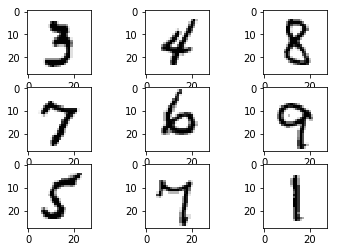

In [5]:
idx = np.random.randint(X.shape[0], size=9)
plt.figure(1)
pos = 331
for choice in X[idx,:]:
    mat = choice.reshape(28,28)
    plt.subplot(pos)
    plt.imshow(mat, cmap='binary')
    pos += 1
plt.show()

In [ ]:
#X_embedded = TSNE(n_components=10).fit_transform(X)

In [6]:
kmeans = KMeans(n_clusters=10, init="k-means++").fit(X)

In [7]:
X_embedded = kmeans.transform(X)

In [8]:
print(X_embedded[0,:])
print(X_embedded[1,:])
print(X_embedded[2,:])

[ 2232.77856378  2327.92274909  2189.18028633  2204.9957965   2416.45292712
  2030.20330517  2242.37369682  1822.15233231  2221.33378035  1168.70645437]
[ 2341.01334185  2582.09091546  2401.87969401  2633.05919891  2825.32394844
  2387.61457103  2473.9430275   2228.71961497  2454.69347348  1466.33811153]
[ 2387.37478711  2501.95930137  2544.78823115  2291.61287492  2545.95302213
  2508.93006626  2536.23073468  1731.28655113  2647.18911545  2551.08300946]


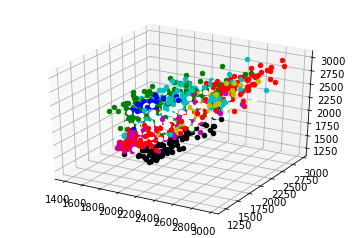

In [12]:
color = ["r", "b", "g", "c", "m", "y", "k", "w", "g", "r"]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0, 1400, 1):
    # plt.scatter(X_embedded[i, 0], X_embedded[i, 1], c=color[int(y[i])])
    ax.scatter(X_embedded[i, 0], X_embedded[i, 1], X_embedded[i, 2], c=color[int(y[i])])
plt.show()